# 3. Performing virtual knock-out on the data

In [1]:
import scTenifold as st
from scTenifold.data import get_test_df

In [2]:
df = get_test_df(100, 100)

In [6]:
knk = st.scTenifoldKnk(data=df,
                       ko_genes=["NG-1"],  # the gene you wants to knock out
                       qc_kws={"min_lib_size": 10})

### Run scTenifoldKnk.build()</br>
Just like scTenifoldNet, this method will use all kws inside the instance to run scTenifold pipeline (qc_kws, nc_kws, ko_kws, td_kws, ma_kws, dr_kws)

In [ ]:
knk.build()

### Run step separately

In [3]:
knk = st.scTenifoldKnk(data=df,
                       qc_kws={"min_lib_size": 10})

Removed 0 cells with lib size < 10
Removed 2 outlier cells from original data
Found mitochondrial genes: ['MT-1', 'MT-10', 'MT-2', 'MT-3', 'MT-4', 'MT-5', 'MT-6', 'MT-7', 'MT-8', 'MT-9']
Removed 48 samples from original data (mt genes ratio > 0.1)
Removed 0 genes expressed in less than 0.05 of data
Removed 82 genes with expression values: average < 0.05 or sum < 25


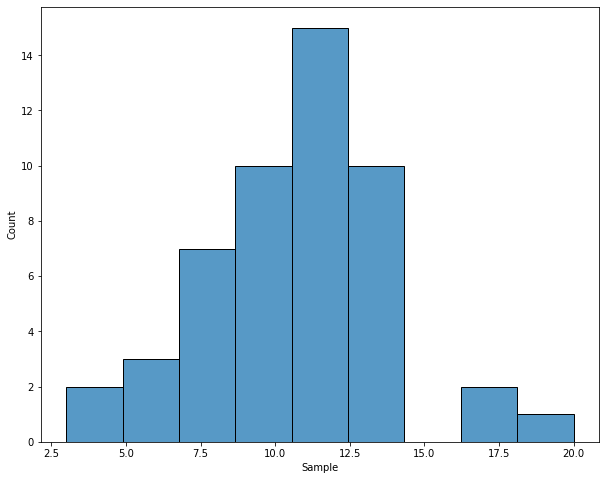

finish QC: WT
process qc finished in 0.20067200000000085 secs.


In [4]:
knk.run_step("qc")

In [5]:
knk.run_step("nc", n_cpus=1)

make_networks  processing time:  1.1661617999999994
process nc finished in 1.1664437999999997 secs.


In [6]:
knk.network_dict["WT"]

[<18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 17 stored elements in COOrdinate format>,
 <18x18 sparse matrix of type '<class 'numpy.float64'>'

In [7]:
knk.run_step("td")

Using tensorly
(18, 18, 10)
tensor_decomp  processing time:  0.35166849999999883
process td finished in 0.3525986999999997 secs.


In [8]:
knk.tensor_dict["WT"]

,NG-1,NG-13,NG-16,NG-19,NG-28,NG-40,NG-45,NG-46,NG-5,NG-52,NG-53,NG-61,NG-7,NG-80,NG-85,NG-88,NG-89,NG-90
NG-1,0.2,0.0,0.0,0.8,0.0,0.0,-0.0,0.0,0.6,0.0,-0.0,0.0,-0.0,0.0,0.0,0.1,0.0,0.0
NG-13,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.1,-0.0,0.0,0.0,0.0
NG-16,-0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.2,-0.0,0.0,-0.0,0.0
NG-19,0.1,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.6,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
NG-28,0.0,0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.2,0.0,-0.0,0.0,0.0
NG-40,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.1,-0.1,0.0,-0.0,0.7,0.0
NG-45,-0.0,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.1,-0.2,-0.0,0.0,-0.3,0.0
NG-46,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,-0.0,0.1,0.0
NG-5,0.2,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.1,0.2,0.0,0.0
NG-52,-0.0,0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.1,-0.4,-0.0,0.0,-0.0,0.0


In [10]:
knk.run_step("ko", ko_genes=["NG-1"], ko_method="default")

process ko finished in 0.003620499999996696 secs.


In [11]:
knk.tensor_dict["KO"]

,NG-1,NG-13,NG-16,NG-19,NG-28,NG-40,NG-45,NG-46,NG-5,NG-52,NG-53,NG-61,NG-7,NG-80,NG-85,NG-88,NG-89,NG-90
NG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NG-13,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.1,-0.0,0.0,0.0,0.0
NG-16,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.2,-0.0,0.0,-0.0,0.0
NG-19,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.6,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
NG-28,0.0,0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.2,0.0,-0.0,0.0,0.0
NG-40,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.1,-0.1,0.0,-0.0,0.7,0.0
NG-45,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.1,-0.2,-0.0,0.0,-0.3,0.0
NG-46,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,-0.0,0.1,0.0
NG-5,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.1,0.2,0.0,0.0
NG-52,0.0,0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.1,-0.4,-0.0,0.0,-0.0,0.0


In [12]:
knk.run_step("ma")

manifold_alignment  processing time:  0.0064454999999981055
process ma finished in 0.006519499999996015 secs.


C:\Users\qwerty239qwe\Anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1266: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


In [17]:
knk.run_step("dr", sorted_by="adjusted p-value")

d_regulation  processing time:  0.009353099999998449
process dr finished in 0.009442499999977372 secs.


In [18]:
knk.d_regulation

,Gene,Distance,boxcox-transformed distance,Z,FC,p-value,adjusted p-value
7,NG-19,1.066717,0.062434,-0.846103,0.568945,0.450678,0.507013
5,NG-40,0.876763,-0.141083,-1.976555,0.384358,0.535280,0.535280
15,NG-1,1.071395,0.066512,-0.823451,0.573946,0.448695,0.538434
2,NG-13,0.918928,-0.088434,-1.684115,0.422216,0.515833,0.546177
13,NG-80,1.125443,0.111105,-0.575755,0.633314,0.426142,0.547897
11,NG-88,1.162901,0.139514,-0.417953,0.676173,0.410908,0.568949
0,NG-53,1.177585,0.150144,-0.358908,0.693357,0.405025,0.607537
4,NG-46,1.244077,0.195056,-0.109443,0.773868,0.379023,0.620220
16,NG-90,1.246376,0.196520,-0.101308,0.776730,0.378143,0.680657
8,NG-89,1.254049,0.201369,-0.074373,0.786324,0.375214,0.750428


### Save outputed objects: pcNets, tensor decompositions, manifold alignments, regulation dataframe

In [ ]:
knk.save("./path")

### to load the result, use

In [ ]:
knk2 = st.scTenifoldKnk.load("./path")